# Projeto E-Commerce Shipping

Fonte do Projeto: https://www.kaggle.com/datasets/prachi13/customer-analytics

Este projeto visa identificar se o produto de um comércio eletrônico chegou em atraso ou não. Desta forma é um problema de classificação.

**Dicionário de dados**:

| Variável            | Descrição                                                                   |
|---------------------|-----------------------------------------------------------------------------|
| ID                  | Número de identificação dos clientes.                                       |
| Warehouse block     | A empresa possui um grande armazém que é dividido em blocos, como A, B, C, D, E.|
| Mode of shipment    | A empresa envia os produtos de várias maneiras, como Navio, Avião e Rodovia.|
| Customer care calls | O número de chamadas feitas para consulta sobre o envio.                    |
| Customer rating     | A empresa classificou cada cliente. 1 é a menor classificação (pior), 5 é a maior (melhor).|
| Cost of the product| Custo do produto em dólares americanos.                                     |
| Prior purchases     | O número de compras anteriores.                                             |
| Product importance  | A empresa categorizou o produto em diversos parâmetros, como baixo, médio, alto.|
| Gender              | Masculino e Feminino.                                                       |
| Discount offered    | Desconto oferecido no produto específico.                                   |
| Weight in gms       | É o peso em gramas.                                                         |
| Reached on time     | É a variável alvo, onde 1 indica que o produto NÃO chegou no prazo e 0 indica que chegou no prazo.|

## O que será feito neste notebook?


Realizaremos as tarefas referentes a Análise de Dados, primeiro vamos preparar o dataset para a etapa de modelagem realizando o split do dataset em treino e teste, depois vamos fazer a identificação e tratamento de dados ausentes, dados duplicados, outliers, esta etapa vai ser a Análise Exploratória dos dados.

Depois com Análise Descritiva vamos estudar como os dados estão organizados, vamos estudar cada feature de maneira individual e como ela se comporta com outras features, vamos procurar correlações, relevancia com WOE e IV, além da dispersão, distribuição tudo isso para completar o que chamamos de Entendimento dos Dados.

Portanto, este notebook compreende bem a tarefa de Análise de dados com Análise Exploratória e Análise Descritiva.

## Importação das Bibliotecas e Configurações

In [1]:
# Bibliotecas de Manipulação dos Dados
import pandas as pd
import numpy as np

# Biblioteca de Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Bibliteca para filtrar warnings - deixando o notebook mais limpo a respeito de atualizações e entre outros avisos
import warnings
warnings.filterwarnings('ignore')

# Bibliteca Pessoal para analise de dados
import libs.preprocessor as pp

In [2]:
# Maximo de colunas para visualização - Configuração do Pandas
pd.set_option('display.max_columns', None)

## Importação dos Dados

In [3]:
# Importação do arquivo
df = pd.read_csv('dataset/Train.csv')

# Visualizando o dataset
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
# Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


## 1. Realização do Split

Como temos apenas um dataset com 10999 registros em 12 features, vamos realizar a parte de split em treino e teste.

Isso evita o chamado **Data Leakage** ou vazamento de dados, isto é, talvez na etapa de tratamento de dados pode ser que utilizamos tecnicas de imputação de valores que usa a média ou mediana, e fazer a imputação antes do split gera um vazamento dos dados.

Logo, é lógico e comum realizar o split dos dados antes de qualquer etapa de Análise de Dados.

In [5]:
# Biblioteca para a realização do split
from sklearn.model_selection import train_test_split

In [6]:
# Separando as variaveis
X, y = df.drop(['Reached.on.Time_Y.N', 'ID'], axis=1), df['Reached.on.Time_Y.N']

# Treino e Test de maneira estratificada para distribuição por igual (não perdendo a proporção da variavel alvo)
# E o parametro Shuffle garante que será embaralhada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [7]:
# Verificando proporções
print(f'Proporção de Treino: {pd.Series(y_train).value_counts(normalize=True).round(2)}')
print(f'\nProporção de Teste: {pd.Series(y_test).value_counts(normalize=True).round(2)}')

Proporção de Treino: Reached.on.Time_Y.N
1    0.6
0    0.4
Name: proportion, dtype: float64

Proporção de Teste: Reached.on.Time_Y.N
1    0.6
0    0.4
Name: proportion, dtype: float64


In [8]:
# Juntando os datasets e salvando para resgata-los depois

# Treino
df_train = X_train
df_train['Reached_on_Time'] = y_train

# Teste
df_test = X_test
df_test['Reached_on_Time'] = y_test


# Salvando os datasets
df_train.to_pickle('dataset/df_train.pkl')
df_test.to_pickle('dataset/df_test.pkl')

In [9]:
# Verificando as dimensoes dos dataset's
df_train.shape, df_test.shape

((8799, 11), (2200, 11))

## 2. Análise de Dados

### 2.1 Análise Exploratória dos Dados

Nesta etapa vamos realizar algumas tarefas de manipulação dos dados, tarefas que vamos executar:

- Identificação e Tratamento de dados Ausentes (NaN ou qualquer valor anormal);
- Identificação e Tratamento de Dados Duplicados;
- Identificação e Tratamento de Features com proporção de numeros zerados ou de outras variáveis;
- Identificação e Tratamento de Outliers;
- Separar as variaveis em numericas e categoricas;
- Transformar e padronizar os dados (features categoricas com string's para numericas, ou realização de encoding).

#### 2.1.1 Identificando e Tratando Dados Ausentes

In [10]:
# Funcao para mapear as features
def criando_dict_features (df):
    
    # Dicionario com algumas caracteristicas das features
    dict_features = {
        'Features': [],
        'Type': [],
        'Nunique': [],
        'Unique': []
    }
    
    # Loop para as informações das features
    for feature in df.columns:
        dict_features['Features'].append(feature)
        # Vimos no dicionario de dados que algumas features categoricas tem até 5 grupos
        # Portanto, toda feature que tiver valores unicos abaixo de 6 será uma variavel categorica.
        dict_features['Type'].append('Categorica' if df[feature].nunique() < 6 else 'Numerica')
        dict_features['Nunique'].append(df[feature].nunique())
        
        # Ordenando os valores unicos
        lista = df[feature].unique().tolist()
        lista.sort()
        dict_features['Unique'].append(lista)
        
    # Transformando os dados em Dataframe
    df_dict_features = pd.DataFrame(dict_features).sort_values('Nunique', ascending=True)

    return df_dict_features

# Visualizando os dados
df_dict_features = criando_dict_features(df_train)
df_dict_features

,Features,Type,Nunique,Unique
7,Gender,Categorica,2,"[F, M]"
10,Reached_on_Time,Categorica,2,"[0, 1]"
1,Mode_of_Shipment,Categorica,3,"[Flight, Road, Ship]"
6,Product_importance,Categorica,3,"[high, low, medium]"
0,Warehouse_block,Categorica,5,"[A, B, C, D, F]"
3,Customer_rating,Categorica,5,"[1, 2, 3, 4, 5]"
2,Customer_care_calls,Numerica,6,"[2, 3, 4, 5, 6, 7]"
5,Prior_purchases,Numerica,8,"[2, 3, 4, 5, 6, 7, 8, 10]"
8,Discount_offered,Numerica,65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,Cost_of_the_Product,Numerica,215,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,..."


In [11]:
# Verificando dados ausentes
df_train.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

**Comentários**

Notamos acima que não há valores nulos setados como *NaN*, e também com o dataframe *df_dict_features* notamos que também não há nenhum valor que indica ausencia de informação como valores -1.

Então **NÃO há valores Ausentes**

#### 2.1.2 Identificando e Tratando Dados Duplicados

Um dado é considerado duplicado quando todas as features são exatamente iguais, bom retiramos a coluna **`ID`** que poderia demonstrar esta diferença, de qualquer maneira, temos 11 colunas, se 11 features forem iguais certamente será um dado duplicado

In [12]:
# Verificando dados Duplicados 
df_train.duplicated().sum()

0

**Comentários**

Conforme falado na celula acima, o dado é considerado duplicado quando as 11 features são exatamente iguais, e não há nenhum registro com esta caracteristica.

Então **NÃO há valores duplicados**

#### 2.1.3 Identificando e Tratando Proporção dos Dados

In [13]:
# Lista de features categoricas
for feature in df_train.columns:
    print(f'Feature: {feature}:')
    print(f'\n{df_train[feature].value_counts(normalize=True).round(2)}\n')
    print('---------------------------------------')

Feature: Warehouse_block:

Warehouse_block
F    0.33
B    0.17
D    0.17
A    0.17
C    0.17
Name: proportion, dtype: float64

---------------------------------------
Feature: Mode_of_Shipment:

Mode_of_Shipment
Ship      0.68
Flight    0.16
Road      0.16
Name: proportion, dtype: float64

---------------------------------------
Feature: Customer_care_calls:

Customer_care_calls
4    0.32
3    0.30
5    0.21
6    0.09
2    0.06
7    0.02
Name: proportion, dtype: float64

---------------------------------------
Feature: Customer_rating:

Customer_rating
3    0.2
1    0.2
4    0.2
5    0.2
2    0.2
Name: proportion, dtype: float64

---------------------------------------
Feature: Cost_of_the_Product:

Cost_of_the_Product
257    0.01
245    0.01
243    0.01
255    0.01
264    0.01
       ... 
297    0.00
120    0.00
99     0.00
122    0.00
96     0.00
Name: proportion, Length: 215, dtype: float64

---------------------------------------
Feature: Prior_purchases:

Prior_purchases
3     0.3

**Comentários**

Olhando para as features categoricas a proporção das classes estão 'equilibradas', ou seja, nenhum classe tem um peso tão grande no caso de 80% a 90%, todas elas estão 'distribuidas'. Este processo é importante porque quando uma feature tem uma proporção exagerada de valor no caso 90% não faz sentido manter esta feature, visto que ela não tem uma grande relevância, afinal ela só tem um classe. Claro, isso não é uma regra, afinal, valores distintos podem ser a diferença na predição.

Mas neste caso, as features estão bem 'equilibradas'.

#### 2.1.4 Identificando e Tratando os Outliers

In [14]:
# listando as features numericas
cols_num = [row['Features'] for i, row in df_dict_features.iterrows() if row['Type'] == 'Numerica']

print(f'Visulizando as features: {cols_num}\nQuantidade de Colunas Numericas: {len(cols_num)}')

# Utilizando a biblioteca pessoal para outliers... setando a classe
outliers = pp.Outlier(df_train)

# Visualizando os outliers
outliers.getOverview(cols_num)

Visulizando as features: ['Customer_care_calls', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms']
Quantidade de Colunas Numericas: 5


Nome de Coluna,Discount_offered,Prior_purchases,Customer_care_calls,Cost_of_the_Product,Weight_in_gms
Min,1,2,2,96,1001
Q1,4.0,3.0,3.0,170.0,1838.0
Median,7.0,3.0,4.0,214.0,4140.0
Q3,10.0,4.0,5.0,251.0,5045.0
Max,65,10,7,310,7846
IQR,6.0,1.0,2.0,81.0,3207.0
Lower fence,-5.0,1.5,0.0,48.5,-2972.5
Upper fence,19.0,5.5,8.0,372.5,9855.5
Skew,1.796737,1.682027,0.402827,-0.162501,-0.244509
Num_Outliers,1776,825,0,0,0


**Comentários**

Temos 5 features numericas, e apenas 2 features apresenta valores discrepantes: `Discount_offered` e `Prior_purchases`.

Não precisa de um tratamento afinal os outliers destas variaveis parecem ser valores reais, além disso o percentual destes valores é baixo com relação ao dataset. Portanto, vamos manter os dados outliers sem qualquer tratamento por se tratar de um valor real.

#### 2.1.5 Separar as variaveis em numericas e categoricas

In [15]:
# Dataframe com as features separados
df_dict_features

,Features,Type,Nunique,Unique
7,Gender,Categorica,2,"[F, M]"
10,Reached_on_Time,Categorica,2,"[0, 1]"
1,Mode_of_Shipment,Categorica,3,"[Flight, Road, Ship]"
6,Product_importance,Categorica,3,"[high, low, medium]"
0,Warehouse_block,Categorica,5,"[A, B, C, D, F]"
3,Customer_rating,Categorica,5,"[1, 2, 3, 4, 5]"
2,Customer_care_calls,Numerica,6,"[2, 3, 4, 5, 6, 7]"
5,Prior_purchases,Numerica,8,"[2, 3, 4, 5, 6, 7, 8, 10]"
8,Discount_offered,Numerica,65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,Cost_of_the_Product,Numerica,215,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,..."


In [16]:
# Feature numericas já reservadas na hora de apresentar os outliers na seção 2.1.4
print(f'Visulizando as features Numericas: {cols_num}\nQuantidade de Colunas Numericas: {len(cols_num)}')
      
# Pegando as features categoricas
cols_cat = [row['Features'] for i, row in df_dict_features.iterrows() if row['Type'] == 'Categorica']
print('\n')
print(f'Visulizando as features Categoricas: {cols_cat}\nQuantidade de Colunas Categoricas: {len(cols_cat)}')

Visulizando as features Numericas: ['Customer_care_calls', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms']
Quantidade de Colunas Numericas: 5


Visulizando as features Categoricas: ['Gender', 'Reached_on_Time', 'Mode_of_Shipment', 'Product_importance', 'Warehouse_block', 'Customer_rating']
Quantidade de Colunas Categoricas: 6


**Comentários**

Fazemos esta separação agora porque geralmente as seções acima faz algumas mudanças nas features, seja na exclusão ou qualquer inserção.

Mas como o dataset não sofreu alteração, então a classificação das features não muda. Claro, na Análise Descritiva podemos fazer a *feature engineering* então pode ser que aja alguma alteração nesta classificação.

#### 2.1.6 Transformar e padronizar os dados (features categoricas com string's para numericas, ou realização de encoding).

In [17]:
# Visualizando o dataset
df_train.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
7920,D,Road,4,1,261,2,medium,F,9,4158,0
1529,F,Ship,3,3,162,2,low,F,26,1659,1
10521,B,Ship,3,2,221,2,medium,M,9,4466,0


In [18]:
# Features Mapeados
df_dict_features

,Features,Type,Nunique,Unique
7,Gender,Categorica,2,"[F, M]"
10,Reached_on_Time,Categorica,2,"[0, 1]"
1,Mode_of_Shipment,Categorica,3,"[Flight, Road, Ship]"
6,Product_importance,Categorica,3,"[high, low, medium]"
0,Warehouse_block,Categorica,5,"[A, B, C, D, F]"
3,Customer_rating,Categorica,5,"[1, 2, 3, 4, 5]"
2,Customer_care_calls,Numerica,6,"[2, 3, 4, 5, 6, 7]"
5,Prior_purchases,Numerica,8,"[2, 3, 4, 5, 6, 7, 8, 10]"
8,Discount_offered,Numerica,65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,Cost_of_the_Product,Numerica,215,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,..."


**Decisões a tomar**

As variaveis Categoricas ou Qualitativas podem ser dividias em dois grupos: Nominal e Ordinal. O nosso dataset tem estas duas divisões. Por exemplo as features: `Gender`, `Mode_of_Shipment` e `Warehouse_block` são **Features Qualitativas Nominais**, afinal este grupo de categoria não tem uma hierarquia ou uma ordem para ser seguida (A respeito da feature `Warehouse_block` esta variavel se refere aos blocos do armazem sendo A, B, C, D e E... mas não há uma hierarquia nestes blocos, ao menos não aparece no dicionario de dados, não há indicação de A é melhor que B , ou A é maior ou menor que B e assim por diante). 

Já as features: `Product_importance` e `Customer_rating` são **Features Qualitativas Ordinais** afinal elas tem uma hierarquia, veja no caso do rating, o rating 5 indica que é melhor que o 4, logo 5 é maior que 4, e este é maior que 3 e assim segue; Em `Product_importance` a empresa classificou o produto como 'high' que é melhor que um produto classificado como 'medium' ou 'low'.

**Obs:** A variavel `Reached_on_Time` é a nossa variavel target, ela não pode entrar no tratamento das variaveis categoricas.

Estamos classificando variáveis categóricas em nominais e ordinais para facilitar a análise. Alguns dados estão em formato de texto e precisam ser convertidos para números, processo conhecido como *encoding*. No entanto, isso requer cuidado, pois diferentes abordagens são necessárias. Alguns modelos interpretam números sequenciais (1, 2, 3, 4...) como representativos de uma ordem, o que pode ser inadequado para variáveis como `Gender` ('F' para feminino e 'M' para masculino) que não possuem hierarquia. Para o modelo, esses números sugerem uma hierarquia inexistente.

Logo precisamos separar as features para fazer as abordagens adequadas. Para as **Features Qualitativas Nominais** vamos usar o *One-Hot Encoder* e para **Features Qualitativas Ordinais** vamos usar *OrdinalEncoder* ambas do sklearn.

In [19]:
# Importação das Bibliotecas
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Biblitoecas para deixar em apenas um modelo_encoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
# preservando o df_train com os dados em string (Isto é bom para visualização mais a frente
df_train_raw = df_train.copy()

In [21]:
# Separação das features
features_ordinais = ['Product_importance'] # Customer_rating já está no tipo numérico

# Modelo Ordinal Encoder (as categorias são apenas uma para a feature: 'Product_importance')
encoder_ordinal = OrdinalEncoder(categories=[['low', 'medium', 'high']])

# Treinamento do encoding ordinal
encoder_ordinal.fit(df_train[features_ordinais])

# Transformando os dados de treinamento
encoded_product_importance = encoder_ordinal.transform(df_train[features_ordinais])

# Adicionando a coluna codificada de volta ao DataFrame original
df_train[features_ordinais] = encoded_product_importance

# Convertendo para int
df_train[features_ordinais] = df_train[features_ordinais].astype(int)

# Visualizando as alterações
df_train.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
7920,D,Road,4,1,261,2,1,F,9,4158,0
1529,F,Ship,3,3,162,2,0,F,26,1659,1
10521,B,Ship,3,2,221,2,1,M,9,4466,0


In [22]:
# Separação das features
features_nominais = ['Gender', 'Mode_of_Shipment', 'Warehouse_block']

# Inicializando e ajustando o OneHotEncoder
encoder_nominal = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features_nominais = encoder_nominal.fit_transform(df_train[features_nominais])

# Obtendo os nomes das novas colunas
encoded_feature_names_nominais = encoder_nominal.get_feature_names_out(features_nominais)

# Criando um DataFrame com as features codificadas
df_encoded_features_nominais = pd.DataFrame(encoded_features_nominais, columns=encoded_feature_names_nominais)

# Adicionando as novas colunas ao DataFrame original
df_train_encoded = pd.concat([df_train.reset_index(drop=True), df_encoded_features_nominais], axis=1)

# Removendo as colunas originais
df_train_encoded.drop(features_nominais, axis=1, inplace=True)

# Convertendo as novas features para int
df_train_encoded = df_train_encoded.astype(int)

# Trazendo para o df_train
df_train = df_train_encoded

In [23]:
# Visualizando o df_train que ira para a modelagem
df_train.head(3)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_Time,Gender_F,Gender_M,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,1,261,2,1,9,4158,0,1,0,0,1,0,0,0,0,1,0
1,3,3,162,2,0,26,1659,1,1,0,0,0,1,0,0,0,0,1
2,3,2,221,2,1,9,4466,0,0,1,0,0,1,0,1,0,0,0


In [24]:
# Visualizando o df_train para visualização
df_train_raw.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
7920,D,Road,4,1,261,2,medium,F,9,4158,0
1529,F,Ship,3,3,162,2,low,F,26,1659,1
10521,B,Ship,3,2,221,2,medium,M,9,4466,0


**Refazendo as mesmas alterações para o dataset de teste**

In [25]:
# Verificando se há valores ausentes
print(f'Valores Ausentes: {df_test.isna().sum().sum()}')

# Verificando se há valores duplicados
print(f'Valores Duplicados: {df_test.duplicated().sum()}')

Valores Ausentes: 0
Valores Duplicados: 0


In [26]:
# Salvando dataset sem alteracoes
df_test_raw = df_test.copy()

# Realizando o Encoding Ordinal

# Transformando os dados de teste
encoded_product_importance = encoder_ordinal.transform(df_test[features_ordinais])

# Adicionando a coluna codificada de volta ao DataFrame original
df_test[features_ordinais] = encoded_product_importance

# Convertendo para int
df_test[features_ordinais] = df_test[features_ordinais].astype(int)


# Realizando o Encoding Nominal

# Transformando os dados de teste
encoded_features_nominais = encoder_nominal.transform(df_test[features_nominais])

# Obtendo os nomes das novas colunas
encoded_feature_names_nominais = encoder_nominal.get_feature_names_out(features_nominais)

# Criando um DataFrame com as features codificadas
df_encoded_features_nominais = pd.DataFrame(encoded_features_nominais, columns=encoded_feature_names_nominais)

# Adicionando as novas colunas ao DataFrame original
df_test_encoded = pd.concat([df_test.reset_index(drop=True), df_encoded_features_nominais], axis=1)

# Removendo as colunas originais
df_test_encoded.drop(features_nominais, axis=1, inplace=True)

# Convertendo as novas features para int
df_test_encoded = df_test_encoded.astype(int)

# Trazendo para o df_train
df_test = df_test_encoded

# Visualizando dados de teste
df_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_Time,Gender_F,Gender_M,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,5,268,3,0,59,2083,1,1,0,0,0,1,0,0,1,0,0
1,7,5,296,4,0,2,1823,1,1,0,0,0,1,1,0,0,0,0
2,3,5,139,2,0,2,5839,0,0,1,0,1,0,1,0,0,0,0
3,5,5,186,4,0,3,4287,0,0,1,0,1,0,1,0,0,0,0
4,3,3,149,4,0,2,5282,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,5,2,121,5,1,10,4790,0,1,0,0,0,1,0,0,1,0,0
2196,5,4,228,5,0,9,1549,1,1,0,0,1,0,0,0,0,1,0
2197,4,5,216,4,1,1,4458,1,1,0,0,0,1,0,0,0,1,0
2198,6,1,254,4,0,2,1071,0,1,0,0,0,1,0,0,0,1,0


In [27]:
# Salvando os modelos e e os encoders
# Biblioteca para salvar os encoders 
from joblib import dump

# Salvando os encoders
dump(encoder_ordinal, 'models/encoders/encoder_ordinal.joblib')
dump(encoder_nominal, 'models/encoders/encoder_nominal.joblib')

# Salvando os datasets de treino
df_train_raw.to_pickle('dataset/df_train_raw.pkl')
df_train.to_pickle('dataset/df_train.pkl')

# E de teste
df_test_raw.to_pickle('dataset/df_test_raw.pkl')
df_test.to_pickle('dataset/df_test.pkl')

### 2.2 Análise Descritiva dos Dados

In [28]:
# para facilitar vamos colocar o nome do df_train_raw para simplesmente df
df = df_train_raw

In [29]:
# Visualização das variaveis
df_dict_features

,Features,Type,Nunique,Unique
7,Gender,Categorica,2,"[F, M]"
10,Reached_on_Time,Categorica,2,"[0, 1]"
1,Mode_of_Shipment,Categorica,3,"[Flight, Road, Ship]"
6,Product_importance,Categorica,3,"[high, low, medium]"
0,Warehouse_block,Categorica,5,"[A, B, C, D, F]"
3,Customer_rating,Categorica,5,"[1, 2, 3, 4, 5]"
2,Customer_care_calls,Numerica,6,"[2, 3, 4, 5, 6, 7]"
5,Prior_purchases,Numerica,8,"[2, 3, 4, 5, 6, 7, 8, 10]"
8,Discount_offered,Numerica,65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,Cost_of_the_Product,Numerica,215,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,..."


#### 2.2.1 Variável Target 'Reached_on_Time'

In [30]:
# Valores Absolutos
df['Reached_on_Time'].value_counts()

Reached_on_Time
1    5250
0    3549
Name: count, dtype: int64

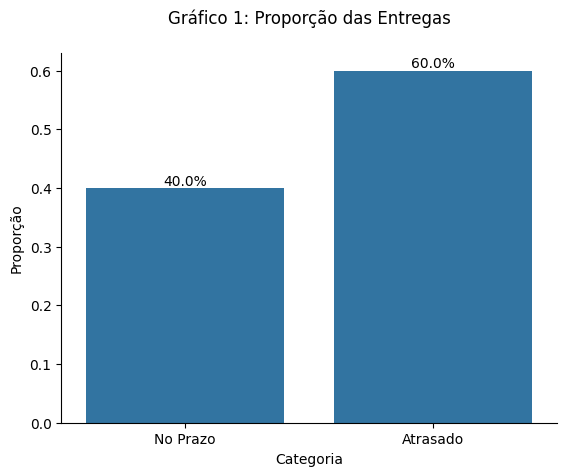

In [31]:
# Calcula a proporção de sites Phishing
target = df['Reached_on_Time'].value_counts(normalize=True).round(2).sort_values(ascending=True)

# Cria o gráfico de barras
ax = sns.barplot(x=target.index, y=target.values)

# Adiciona os textos (valores) em cima das barras
for index, value in enumerate(target):
    # Ajuste da coordenada y para se basear na altura da barra da classe 1
    height = ax.patches[index].get_height()
    ax.text(index, height, str(f'{value*100}%'), ha='center', va='bottom')

# Substitui os valores de 0 e 1 pelos rótulos desejados no eixo x
ax.set_xticklabels(['No Prazo', 'Atrasado'])

# Adiciona rótulos ao gráfico
plt.xlabel('Categoria')
plt.ylabel('Proporção')
plt.title('Gráfico 1: Proporção das Entregas\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o gráfico
plt.show()

 **Sobre a figura**
 
 Conforme podemos observar a presença de entregas em atraso está em maior quantidade, podemos considerar deste modo que a classe está um pouco desbalanceada, esta diferença de 20% se refere a 1701 em valores absolutos. Portanto para a etapa de modelagem talvez seja melhor efetuar uma tecnica de *sampling*.

#### 2.2.2 Variável 'Mode_of_Shipment'

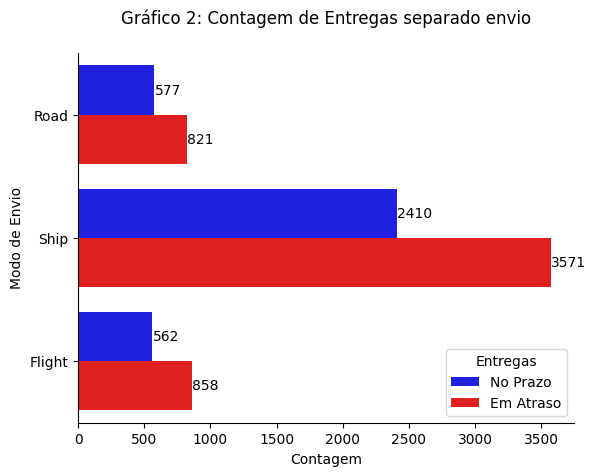

In [32]:
# Cria o gráfico de contagem
ax = sns.countplot(data=df, y='Mode_of_Shipment', hue='Reached_on_Time', palette={0: 'blue', 1:'red'})

# Adiciona rótulos ao gráfico
plt.title('Gráfico 2: Contagem de Entregas separado envio\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Adiciona rótulos aos eixos
plt.xlabel('Contagem')
plt.ylabel('Modo de Envio')

# Adiciona legenda
plt.legend(title='Entregas', loc='lower right', labels=['No Prazo', 'Em Atraso'])

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        ax.text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')

# Exibe o gráfico
plt.show()

 **Sobre a figura**
 
Referente a feature de `'Mode_of_Shipment'` nota-se que o envio por Navio é o mais utilizado. Mas esta feature não tem uma relevância em prever atraso, porque em todos os tipos de envio as entregas foram em sua maioria em atraso. E como vimos no Gráfico 1, os dados de atraso é a maioria, logo, não podemos concluir nada.

#### 2.2.3 Variável 'Product_importance'

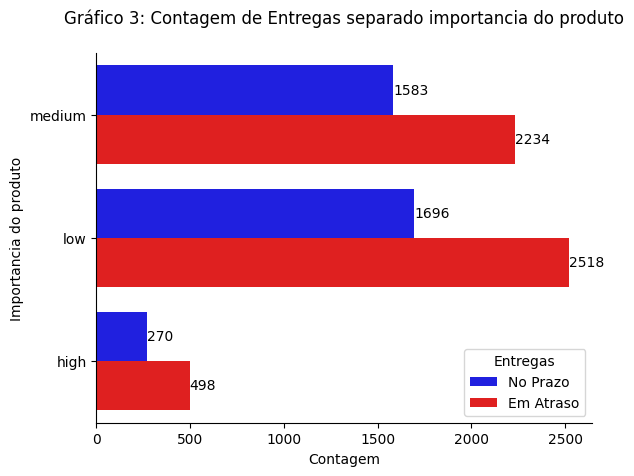

In [33]:
# Cria o gráfico de contagem
ax = sns.countplot(data=df, y='Product_importance', hue='Reached_on_Time', palette={0: 'blue', 1:'red'})

# Adiciona rótulos ao gráfico
plt.title('Gráfico 3: Contagem de Entregas separado importancia do produto\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Adiciona rótulos aos eixos
plt.xlabel('Contagem')
plt.ylabel('Importancia do produto')

# Adiciona legenda
plt.legend(title='Entregas', loc='lower right', labels=['No Prazo', 'Em Atraso'])

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        ax.text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')
        

# Exibe o gráfico
plt.show()

**Sobre a figura**
 
Referente a feature de `'Product_importance'` ela tambem não tem muita relevância com a variavel alvo, a forma como a empresa classifica os produtos tem tambem em sua maioria os dados de entrega em atraso, mas novamente, visto que a maioria dos dados é entrega em atraso, logo não podemos concluir nada.

Podemos notar que poucos produtos recebem a classificação de 'high', geralmente eles são classificados como 'medium' e 'low'.

#### 2.2.4 Variável 'Customer_rating'

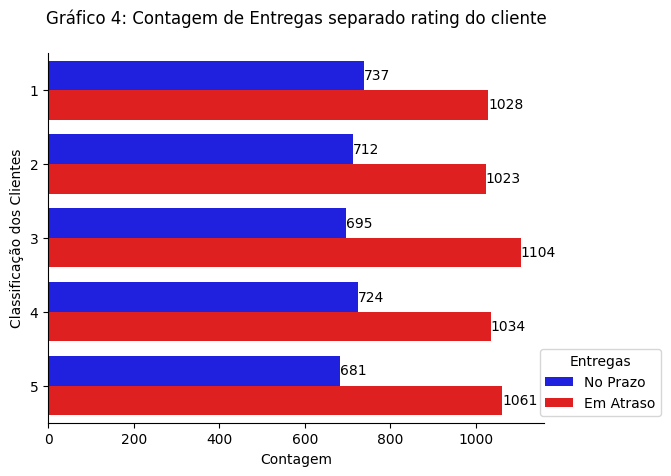

In [34]:
# Cria o gráfico de contagem
ax = sns.countplot(data=df, y='Customer_rating', hue='Reached_on_Time', palette={0: 'blue', 1:'red'})

# Adiciona rótulos ao gráfico
plt.title('Gráfico 4: Contagem de Entregas separado rating do cliente\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Adiciona rótulos aos eixos
plt.xlabel('Contagem')
plt.ylabel('Classificação dos Clientes')

# Adiciona legenda
plt.legend(title='Entregas', loc='lower right', labels=['No Prazo', 'Em Atraso'], bbox_to_anchor=(1.25, 0))

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        ax.text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')

# Exibe o gráfico
plt.show()

**Sobre a figura**
 
Referente a feature de `'Customer_rating'` e novamente outra variavel que não diz muito sobre as entregas. A classificação de 1 sendo um pessimo cliente, para 5 melhor cliente não diz muito, inclusive esta variavel esta bem equilibrada.

#### 2.2.5 Variável 'Warehouse_block'

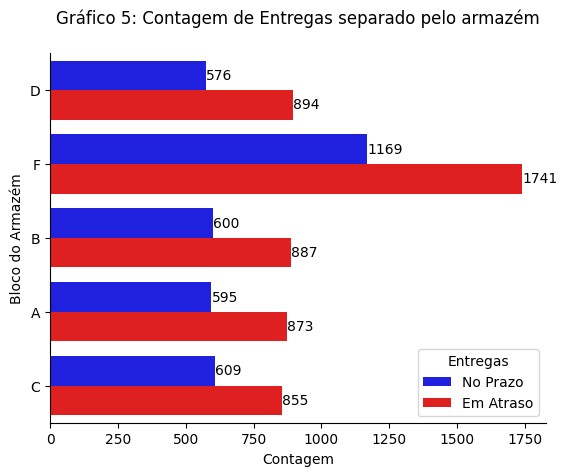

In [35]:
# Cria o gráfico de contagem
ax = sns.countplot(data=df, y='Warehouse_block', hue='Reached_on_Time', palette={0: 'blue', 1:'red'})

# Adiciona rótulos ao gráfico
plt.title('Gráfico 5: Contagem de Entregas separado pelo armazém\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Adiciona rótulos aos eixos
plt.xlabel('Contagem')
plt.ylabel('Bloco do Armazém')

# Adiciona legenda
plt.legend(title='Entregas', loc='lower right', labels=['No Prazo', 'Em Atraso'])

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        ax.text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')

# Exibe o gráfico
plt.show()

**Comentários**

O que podemos ver é que nesta variavel `'Warehouse_block'` não tem uma relevância em prever as entregas. Podemos notar que o Bloco F do Armazém é o local que mais sai entrega.

#### 2.2.6 Correlação das Variáveis

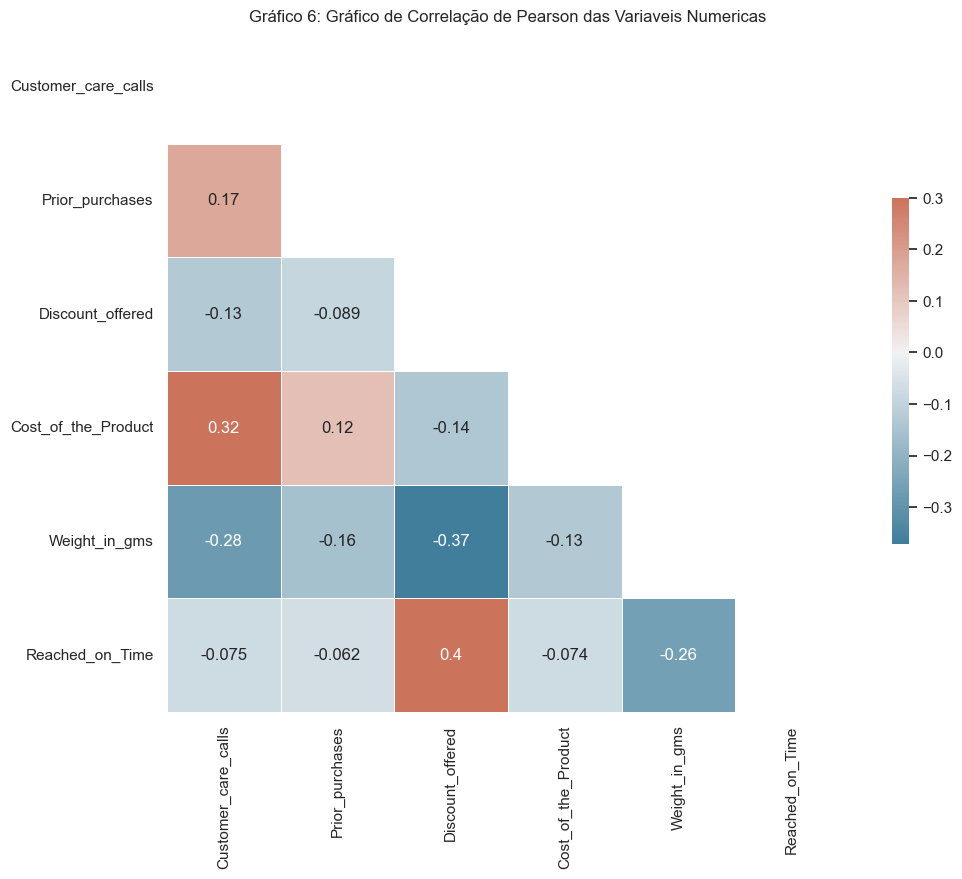

In [36]:
# Colunas numericas
cols_num.append('Reached_on_Time')

# Dataframe de Correlação
df_corr = df[cols_num].corr()

# Setando o estilo do gráfico
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, annot=True , vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Titulo da imagem
ax.set_title("Gráfico 6: Gráfico de Correlação de Pearson das Variaveis Numericas")


plt.show()

**Comentários**

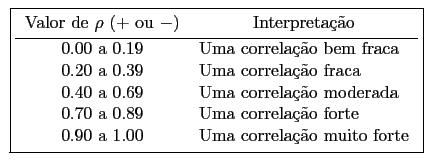

fonte: http://www.leg.ufpr.br/~silvia/CE055/node102.html

As features relevantes que tem uma boa interpretação são duas variaveis:


**Correlação Moderada Positiva:** `'Reached_on_Time'` com `'Discount_offered'` a variavel alvo tem uma correlação com desconto, lembrando que a classe 1 do target indica entrega em atraso, ou seja, conforme o desconto cresce a correlação é da entrega atrasar. (Correlação não implica causalidade, não podemos dizer o que causa este evento, mas talvez por ter desconto é provavel que utilize meios mais baratos e provoque o atraso);


**Correlação Fraca Negativa:** `'Reached_on_Time'` com `'Weight_in_gms'` basicamente a correlação negativa indica sempre o sentido contrário, logo, uma das interpretações é que se o produto é pesado (aumento da variavel `'Weight_in_gms'`) há um fraca correlação de que a  entrega será entregue no prazo (diminuição da variavel `'Reached_on_Time'`), ou, quanto mais leve o produto, há uma fraca correlação de que a entrega pode atrasar.


Estas são as correlações relevantes com a variável target `'Reached_on_Time'`, as outras features não tem uma relevância na correlação.


Outras correlações que podemos citar:

**Correlação Fraca/Moderada Negativa:** `'Discount_offered'` com `'Weight_in_gms'` lembrando correlação negativa é sentido contrário, a interpretação é que o maior desconto é oferecido para produtos com menos peso, ou, produtos mais pesados tem menos descontos.

**Correlação Fraca/Moderada Positiva:** `'Cost_of_the_Product'` com `'Customer_care_calls'` e a correlação mostra que conforme o produto é mais caro, esta correlacionado com o maior numero de chamadas a respeito do envio.

#### 2.2.7 Variavel 'Discount_offered'

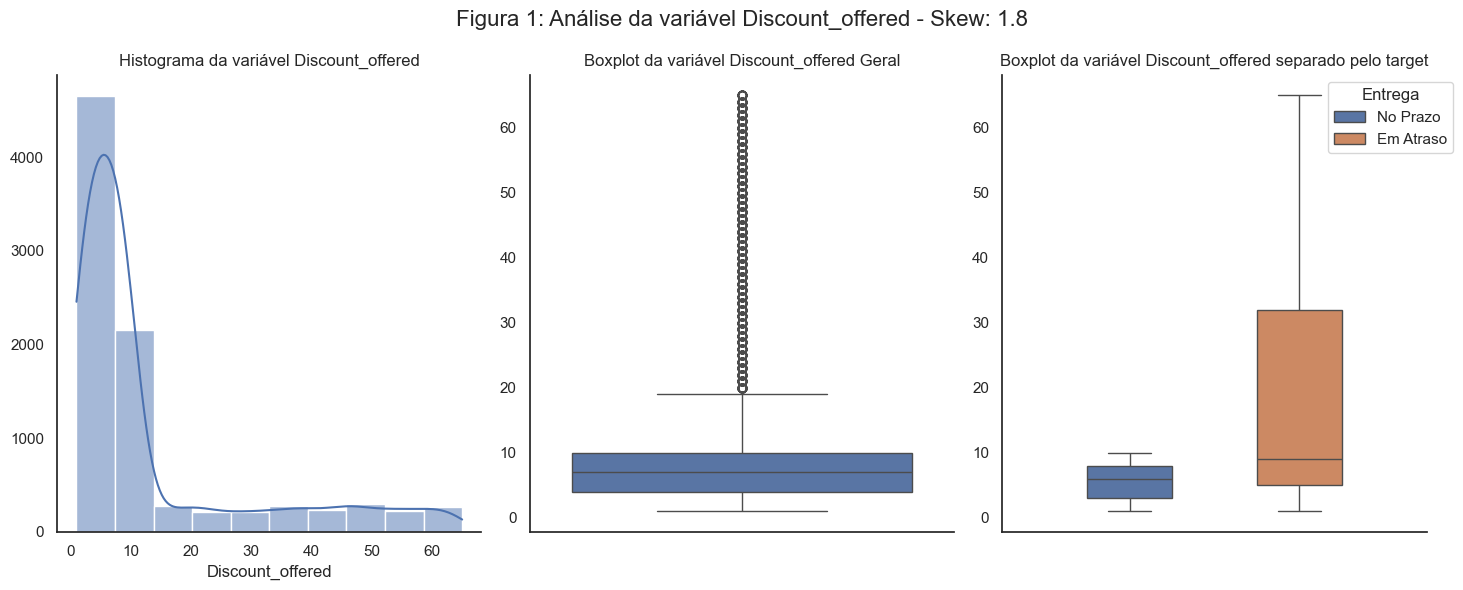

In [37]:
# Verificação da coluna 'url_length'
col = 'Discount_offered'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True, bins=10)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='Reached_on_Time',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['No Prazo', 'Em Atraso'], title='Entrega', bbox_to_anchor=(0.75, 1))

# Titulo da figura
fig.suptitle(f'Figura 1: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre a figura**

Podemos notar primeiramente no histograma que a variavel `'Discount_offered'` tem uma distribuição assimétrica a direita ou positiva. E realmente faz sentido afinal esta variável conforme o dicionário é referente ao desconto do produto, claramente as empresas tendem a dar menos desconto, portanto o histograma tem este comportamento, sendo os intervalos de 0 a 15 com mais registros.  Além disso a medida de skew sendo de 1.8 também indica uma assimetria positiva.

No boxplot geral da variavel notamos o mesmo comportamento do histograma, uma variabilidade entre 0 e 10, onde realmente se concentra a maioria dos dados, com uma mediana abaixo do 10, e valores discrepantes acima de 20, confirmando o dataframe de outliers, esta variavel por este dataframe é a variavel que mais contém outliers 1776 dados discrepantes.

Já no boxplot separado pela variavel target, finalmente conseguimos ver uma evidencia de que a variavel `'Discount_offered'` tem uma certa relevância ao prever a variavel target, podemos notar que entregas com maior desconto pode resultar em atraso, note que a variabilidade dos dados quando a entrega atrasa é muito maior em relação a entregas no prazo, ou seja, uma discrepancia alta nos descontos pode resultar em um entrega em atraso. Mas tambem podemos notar que metade dos registros com desconto abaixo de 10 ainda pode resultar em entregas em atraso ou no prazo.

#### 2.2.8 Variavel 'Weight_in_gms'

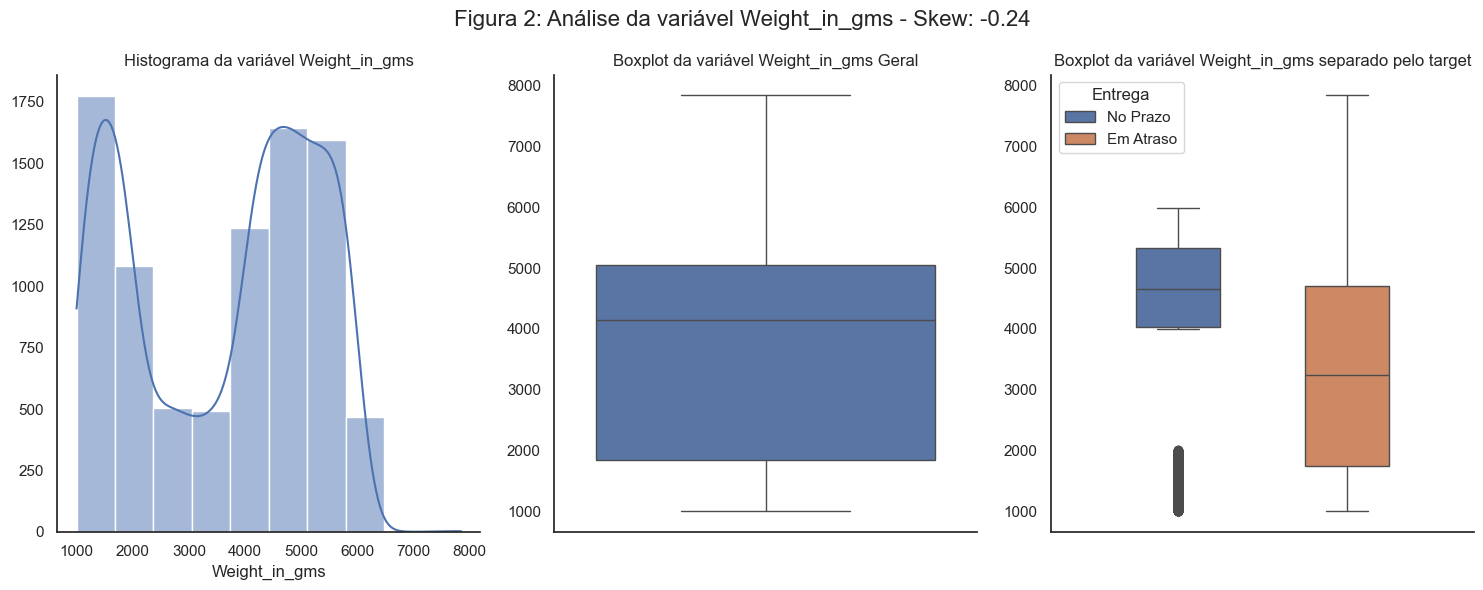

In [38]:
# Verificação da coluna 'url_length'
col = 'Weight_in_gms'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True, bins=10)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='Reached_on_Time',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['No Prazo', 'Em Atraso'], title='Entrega',)

# Titulo da figura
fig.suptitle(f'Figura 2: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre a figura**

A respeito do histograma da variavel `'Weight_in_gms'` possui uma distribuição bimodal, isto é, há dois intervalo de valores que são frequentes, e podemos verificar que o intervalo de 1000 a 2500 e de 4000 a 6000 são valores frequentes, lembrando que estes valores são gramas, portanto, de 1 a 2,5 kg, e 4 a 6 kg são os pesos frequentes do produto. A medida skew() em -0.24 indica uma simetria, mas isso quer dizer que os intervalo de 4kg a 6kg são mais frequentes do que o primeiro intervalo.

O boxplot geral apenas confirma o dataset, a variabilidade está entre 2kg a 5kg e não há presença de outliers, confirmando novamente o dataframe de outliers.

A respeito do boxplot separado pelo target, temos também uma forte evidencia na predição da variavel, notamos que geralmente produtos entre 4 a 5.5 kg é a variabilidade das entregas no prazo, entregas no prazo com peso menor do que 4 kg foram considerados discrepantes ou anormal, embora tenha bastante ocorrencia. De qualquer forma, novamente, produtos que se atrasam tem uma grande variabilidade, mas metade dos registros se referem a peso abaixo dos 4kg, e 75% dos registros abaixo de 5kg... 

#### 2.2.9 Analise multivariada: 'Discount_offered' com 'Weight_in_gms'

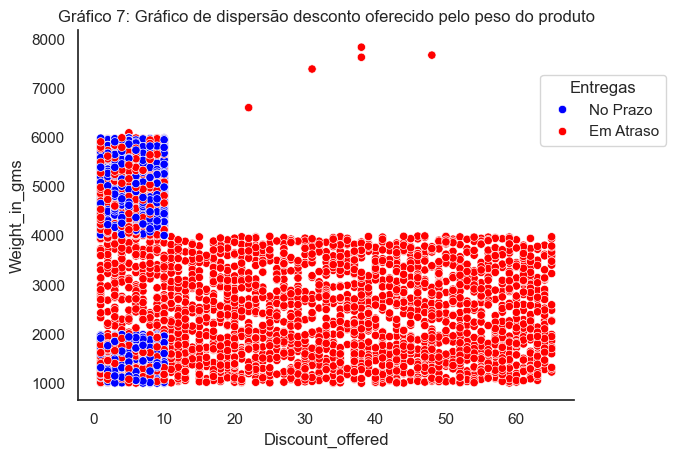

In [39]:
# Define a paleta de cores
palette = {0: 'blue', 1: 'red'}

# Primeira imagem um histograma
ax = sns.scatterplot(data=df, x='Discount_offered', y='Weight_in_gms', hue='Reached_on_Time', palette=palette)
ax.set_title('Gráfico 7: Gráfico de dispersão desconto oferecido pelo peso do produto')

# Adiciona legenda com cores especificadas
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ['No Prazo', 'Em Atraso'], title='Entregas', bbox_to_anchor=(1.2, 0.9))

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Visualizando a imagem
plt.show()

**Sobre a figura**

Este gráfico de dispersão é o resumo ou a soma das seções 2.2.7 e 2.2.8. Estamos confirmando que os dados quando estão **no prazo** tem um padrão quase definido, ele tem um desconto entre 0 e 10 dolares, e o produto fica entre 1 e 2kg (segundo a seção 2.2.8 este intervalo é considerado discrepante e isto se deve ao segundo intervalo), o segundo intervalo de 4kg a 6kg tem mais registros.

Com respeito aos dados com entregas **em atraso** podemos notar uma enorme variabilidade no que se refere ao desconto, ele não esta preso a um intervalo ele é constante. E sobre o peso do produto, embora ele tenha registros acima dos 4kg, nota-se uma enorme presença de valores abaixo dos kg.

Logo praticamente temos evidencia de um padrão, produtos que tenha o peso abaixo dos 4kg e tenha o desconto acima de 10 dolares, há uma forte evidencia de ser uma produto com a entrega em atraso.

#### 2.2.10 Analise multivariada: 'Cost_of_the_Product' com 'Customer_care_calls'

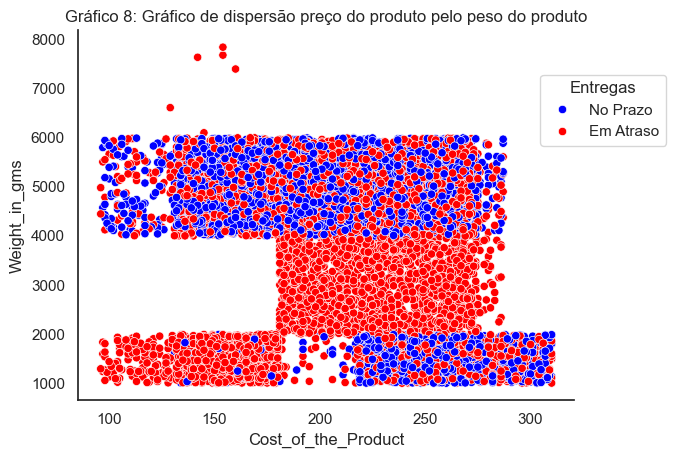

In [40]:
# Define a paleta de cores
palette = {0: 'blue', 1: 'red'}

# Primeira imagem um histograma
ax = sns.scatterplot(data=df, x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached_on_Time', palette=palette)
ax.set_title('Gráfico 8: Gráfico de dispersão preço do produto pelo peso do produto')

# Adiciona legenda com cores especificadas
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ['No Prazo', 'Em Atraso'], title='Entregas', bbox_to_anchor=(1.2, 0.9))

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Visualizando a imagem
plt.show()

**Sobre a figura**

Este gráfico surpreendeu em dois motivos: o primeiro é tinhamos em mente que o produto que fosse mais pesado, fosse mais caro e na verdade segundo gráfico não existe uma correlação tão clara, na verdade, ela uma correlação negativa, talvez porque aja mais dados com peso entre 4kg e 6kg, mas não existe esta regra de produto mais caro ser o mais pesado.

Segundo podemos notar até um certo padrão, veja, os dados entre 4kg e 6kg são praticamente impossivel de identificar, mas nota-se que produtos entre 2kg e 4kg possuem o valor de 200 a 300 dolares e todos foram entregas com atraso, portanto, há uma evidencia de que este intervalo pode ser um comportamento para ser uma entrega em atraso, o produto pesando entre 2 e 4kg custando entre 200 a 300 dolares.

Mas tambem podemos notar que no intervalo de 1 a 2kg, quando o produto custa entre 100 a 200 dolares tambem tem forte evidencia de ser um produto com entrega atrasada, mas depois de 200 dolares já há uma presença de entrega no prazo.

Portanto, nestas variaveis há tambem evidencias para predizer entregas em atraso.